In [12]:
import numpy as np

# 要素
elements = ['A', 'B', 'C', 'D']

# 要素間の関係を示す行列（例として適当な値を使用）
relation_matrix = np.array([
    [1, 0, 1, 0],
    [1, 1, 0, 0],
    [0, 1, 1, 1],
    [0, 0, 0, 1]
])

# # 階層を初期化
# hierarchy = np.zeros_like(relation_matrix)

# # 関係行列を用いて階層構造を特定
# for i in range(len(elements)):
#     for j in range(len(elements)):
#         if relation_matrix[i][j] == 1:
#             hierarchy[i][j] = 1
#             for k in range(len(elements)):
#                 if hierarchy[k][i] == 1:
#                     hierarchy[k][j] = 1

# # 階層構造を表示
# print("Hierarchy Matrix:")
# print(hierarchy)


In [13]:
n = len(relation_matrix)
print('\n----------隣接行列----------')
matrix = relation_matrix.astype(bool)
I = np.eye(n).astype(bool)
adj_matrix = np.logical_or(matrix, I)
print(adj_matrix.astype(int))

print('\n----------可達行列----------')
reachable_matrix = adj_matrix.copy()
while not np.array_equal(reachable_matrix, reachable_matrix @ adj_matrix):
    reachable_matrix = reachable_matrix @ adj_matrix  #@演算子を利用することで行列積を求める（bool演算）
print(reachable_matrix.astype(int))


----------隣接行列----------
[[1 0 1 0]
 [1 1 0 0]
 [0 1 1 1]
 [0 0 0 1]]

----------可達行列----------
[[1 1 1 1]
 [1 1 1 1]
 [1 1 1 1]
 [0 0 0 1]]


In [16]:
import numpy as np
from collections import deque

# 可到達行列（例として適当な値を使用）
reachable_matrix = np.array([
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
    [0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1],
    [0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
    [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0],
    [0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0],
    [0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]
])

# 各ノードの階層（距離）を取得する関数
def calculate_node_levels(matrix):
    n = len(matrix)
    levels = [float('inf')] * n  # 各ノードの初期距離を無限大に設定
    visited = set()  # 訪れたノードを記録するためのセット

    # 幅優先探索（BFS）を行い、各ノードの階層（距離）を計算
    queue = deque()
    queue.append((0, 0))  # 初期ノード（例として0番目のノード）をキューに追加
    visited.add(0)
    levels[0] = 0  # 初期ノードの階層を0に設定

    while queue:
        current_node, current_level = queue.popleft()  # キューからノードを取り出す
        for neighbor in range(n):
            if matrix[current_node][neighbor] == 1 and neighbor not in visited:
                queue.append((neighbor, current_level + 1))
                visited.add(neighbor)
                levels[neighbor] = current_level + 1

    return levels

node_levels = calculate_node_levels(reachable_matrix)
print("Node Levels:")
print(node_levels)


Node Levels:
[0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


Edges List:
[('Node_0', 'Node_1'), ('Node_0', 'Node_2'), ('Node_0', 'Node_3'), ('Node_0', 'Node_4'), ('Node_0', 'Node_5'), ('Node_0', 'Node_6'), ('Node_0', 'Node_7'), ('Node_0', 'Node_8'), ('Node_0', 'Node_9'), ('Node_0', 'Node_10'), ('Node_0', 'Node_11'), ('Node_0', 'Node_12'), ('Node_0', 'Node_13'), ('Node_0', 'Node_14'), ('Node_1', 'Node_3'), ('Node_1', 'Node_4'), ('Node_1', 'Node_6'), ('Node_1', 'Node_7'), ('Node_1', 'Node_8'), ('Node_1', 'Node_10'), ('Node_1', 'Node_12'), ('Node_1', 'Node_13'), ('Node_1', 'Node_14'), ('Node_2', 'Node_3'), ('Node_2', 'Node_4'), ('Node_2', 'Node_5'), ('Node_2', 'Node_6'), ('Node_2', 'Node_7'), ('Node_2', 'Node_8'), ('Node_2', 'Node_9'), ('Node_2', 'Node_10'), ('Node_2', 'Node_11'), ('Node_2', 'Node_12'), ('Node_2', 'Node_13'), ('Node_2', 'Node_14'), ('Node_4', 'Node_3'), ('Node_5', 'Node_3'), ('Node_5', 'Node_4'), ('Node_5', 'Node_6'), ('Node_5', 'Node_7'), ('Node_5', 'Node_12'), ('Node_5', 'Node_13'), ('Node_6', 'Node_3'), ('Node_6', 'Node_4'), ('N

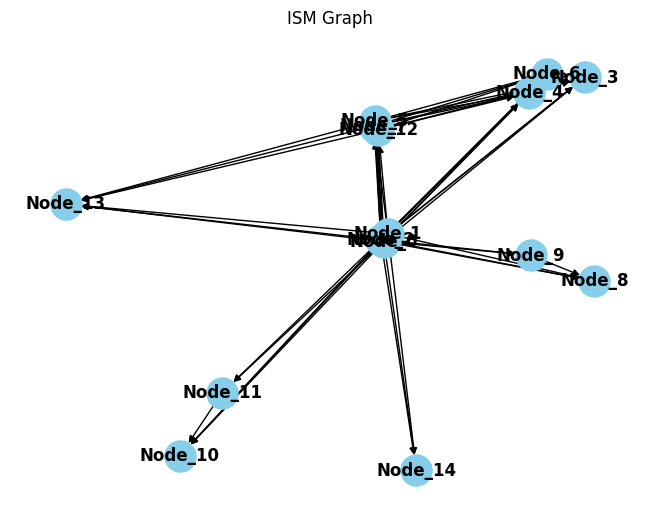

Hierarchy from node Node_1:
['Node_7', 'Node_10', 'Node_3', 'Node_12', 'Node_14', 'Node_13', 'Node_6', 'Node_4', 'Node_8']


In [17]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

# 要素
elements = ['Node_1', 'Node_2', 'Node_3', 'Node_4']

# 要素間の関係を示すエッジリスト（例として適当な値を使用）
# edges = [('A', 'C'), ('A', 'D'), ('B', 'A'), ('B', 'C'), ('C', 'A'), ('C', 'B'), ('C', 'D'), ('D', 'D')]

# エッジリストを取得する関数
def get_edges_from_matrix(matrix):
    edges = []
    n = len(matrix)
    for i in range(n):
        for j in range(n):
            if (i != j) and (matrix[i][j] == 1):  # 1の場合はエッジを追加する
                edges.append((f'Node_{i}', f'Node_{j}'))  # ノード名は適宜変更してください
    return edges

edges_list = get_edges_from_matrix(reachable_matrix)
print("Edges List:")
print(edges_list)

# グラフを作成
G = nx.DiGraph()
G.add_nodes_from(elements)
G.add_edges_from(edges_list)

# グラフを可視化
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=500, node_color='skyblue', font_weight='bold')
plt.title('ISM Graph')
plt.show()

# 階層構造を求める（ノード'A'からの階層構造を取得）
source_node = 'Node_1'
hierarchy = nx.descendants(G, source=source_node)

print(f"Hierarchy from node {source_node}:")
print(list(hierarchy))
